## Part 2

In [1]:
import numpy as np
import sympy as sp
import scipy
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from sympy import sin, cos, asin, acos, pi

In [2]:
%qtconsole

## 1.

## (a)

In [3]:
def randrotate():
    return R.random().as_matrix()

In [4]:
randrotate()

array([[ 0.02646528,  0.80585303, -0.59152386],
       [-0.99630728,  0.06961196,  0.05025912],
       [ 0.0816786 ,  0.58800941,  0.80471954]])

## (b)

In [5]:
for i in range(9):
    r = randrotate()
    print("%.8f" % np.linalg.det(r))
    

1.00000000
1.00000000
1.00000000
1.00000000
1.00000000
1.00000000
1.00000000
1.00000000
1.00000000


## (c)

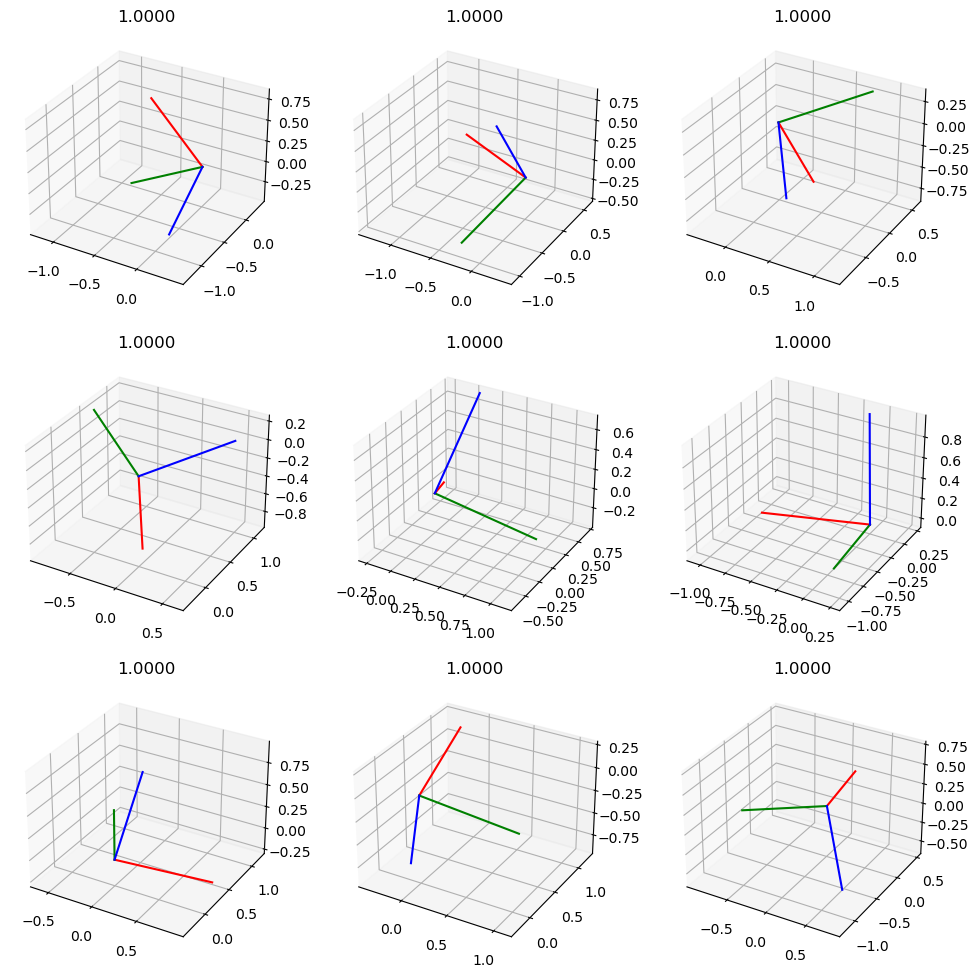

In [6]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)

for i in range(1,10):
    ax = fig.add_subplot(3, 3, i, projection='3d', adjustable='box')
    def plot_frame(R, ax):
        ax.plot([0, R[0,0]], [0, R[1,0]], [0, R[2,0]], 'r')
        ax.plot([0, R[0,1]], [0, R[1,1]], [0, R[2,1]], 'g')
        ax.plot([0, R[0,2]], [0, R[1,2]], [0, R[2,2]], 'b')
    plot_frame(randrotate(), ax)
    ax.axis('equal')
    ax.set_title("%.4f" % np.linalg.det(r))

## 2.

In [7]:
v = np.random.rand(3,1)
r = randrotate()
print("length of vector before rotation: ", np.linalg.norm(v))
print("length of vector after rotation: ", np.linalg.norm(r@v))

    

length of vector before rotation:  1.1200628954615208
length of vector after rotation:  1.1200628954615208


## 3.

## (a)

P:  [[9.45490451]
 [6.76387723]
 [7.76061245]] 
R:  [[-0.4137441  -0.16011821 -0.89620197]
 [ 0.64393353 -0.74735085 -0.16375686]
 [-0.64355685 -0.64484794  0.4123175 ]]


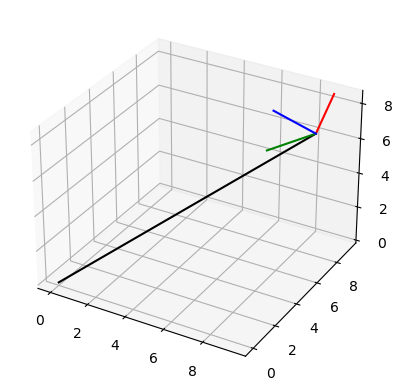

In [8]:
p = np.random.rand(3,1)*10
r = randrotate()
array1 = np.concatenate((r,p), axis=1)
array2 = np.array([0,0,0,1])
T = np.vstack((array1,array2))

def plottransform(se3):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d', adjustable='box')
    origin = np.eye(3)
    P = se3[0:3,3]
    Rx = se3 @ np.array([[1],[0],[0],[1]])
    Ry = se3 @ np.array([[0],[1],[0],[1]])
    Rz = se3 @ np.array([[0],[0],[1],[1]])
    ax.plot([0, P[0]], [0, P[1]], [0, P[2]], color="black")
    ax.plot([P[0], Rx[0,0]], [P[1], Ry[0,0]], [P[2], Rz[0,0]], 'r')
    ax.plot([P[0], Rx[1,0]], [P[1], Ry[1,0]], [P[2], Rz[1,0]], 'g')
    ax.plot([P[0], Rx[2,0]], [P[1], Ry[2,0]], [P[2], Rz[2,0]], 'b')
    
plottransform(T)
print("P: ", p, "\nR: ", r)
    


## (b)

In [9]:
v = np.append(np.random.rand(3,1)*10, [1])
v2 = T @ v
print("length of vector before transform: ", np.linalg.norm(v[0:3]))
print("length of vector after transform: ", np.linalg.norm(v2[0:3]))

length of vector before transform:  10.1929563578753
length of vector after transform:  10.705624107449555


## 4.

## (a)

In [10]:
(t, 
 alpha, 
 gamma, 
 beta) = sp.symbols("""t, 
                    alpha(t),
                    gamma(t),
                    beta(t)""" , real = True)

alpha = sp.Function('alpha', real=True)(t)
gamma = sp.Function('gamma', real=True)(t)
beta = sp.Function('beta', real=True)(t)

Rz1 = sp.Matrix([[cos(alpha), -sin(alpha), 0], 
              [sin(alpha), cos(alpha), 0],
              [0, 0, 1]])
Ry = sp.Matrix([[cos(beta), 0, sin(beta)],
             [0, 1, 0],
             [-sin(beta), 0, cos(beta)]])
Rz2 = sp.Matrix([[cos(gamma), -sin(gamma), 0], 
              [sin(gamma), cos(gamma), 0],
              [0, 0, 1]])

R = Rz1 @ Ry @ Rz2
print(R)



Matrix([[-sin(alpha(t))*sin(gamma(t)) + cos(alpha(t))*cos(beta(t))*cos(gamma(t)), -sin(alpha(t))*cos(gamma(t)) - sin(gamma(t))*cos(alpha(t))*cos(beta(t)), sin(beta(t))*cos(alpha(t))], [sin(alpha(t))*cos(beta(t))*cos(gamma(t)) + sin(gamma(t))*cos(alpha(t)), -sin(alpha(t))*sin(gamma(t))*cos(beta(t)) + cos(alpha(t))*cos(gamma(t)), sin(alpha(t))*sin(beta(t))], [-sin(beta(t))*cos(gamma(t)), sin(beta(t))*sin(gamma(t)), cos(beta(t))]])


## (b)

In [11]:
print(sp.diff(R, t))

Matrix([[-sin(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t) - sin(alpha(t))*cos(gamma(t))*Derivative(gamma(t), t) - sin(beta(t))*cos(alpha(t))*cos(gamma(t))*Derivative(beta(t), t) - sin(gamma(t))*cos(alpha(t))*cos(beta(t))*Derivative(gamma(t), t) - sin(gamma(t))*cos(alpha(t))*Derivative(alpha(t), t), sin(alpha(t))*sin(gamma(t))*cos(beta(t))*Derivative(alpha(t), t) + sin(alpha(t))*sin(gamma(t))*Derivative(gamma(t), t) + sin(beta(t))*sin(gamma(t))*cos(alpha(t))*Derivative(beta(t), t) - cos(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(gamma(t), t) - cos(alpha(t))*cos(gamma(t))*Derivative(alpha(t), t), -sin(alpha(t))*sin(beta(t))*Derivative(alpha(t), t) + cos(alpha(t))*cos(beta(t))*Derivative(beta(t), t)], [-sin(alpha(t))*sin(beta(t))*cos(gamma(t))*Derivative(beta(t), t) - sin(alpha(t))*sin(gamma(t))*cos(beta(t))*Derivative(gamma(t), t) - sin(alpha(t))*sin(gamma(t))*Derivative(alpha(t), t) + cos(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t) + cos(alpha(t))*

## (c)

In [12]:
w = sp.simplify(sp.diff(R, t) @ sp.transpose(R))
print("wx = ", w[2,1], '\n\nwy = ', w[0,2], "\n\nwz = ", w[1,0])


wx =  -sin(alpha(t))*Derivative(beta(t), t) + sin(beta(t))*cos(alpha(t))*Derivative(gamma(t), t) 

wy =  sin(alpha(t))*sin(beta(t))*Derivative(gamma(t), t) + cos(alpha(t))*Derivative(beta(t), t) 

wz =  cos(beta(t))*Derivative(gamma(t), t) + Derivative(alpha(t), t)
